# Applied data science capstone:<br>Traffic EDA & Predicting  accident severity

Author: Orhan Taskopru <br>
Date: 16-09-2020 <br>
A project provided by IBM and Coursera <br>
For more info:<br> 
https://www.coursera.org/learn/applied-data-science-capstone

### 1. Introduction

In this project a dataset that contains information regarding car accidents in Seattle will be used. This dataset will be used to build a machine learning model, which will predict the severity of car accidents. So, the business problem of this project is to get a better understanding of how traffic factors contribute to car accident severity. This knowledge can be used to make traffic saver, so the target audience for this data project is the government (which is responsible for save traffic).

### 2. Data understanding

The provided [Seattle dataset](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv)  has 37 attributes and 195.000 entries. It is recorded by SPD and Traffic Records, which entails accident details in seattle from 2004 to 2020. More information can be found [here](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf). Not all of the 37 attributes will used to build the model, because some of them are there just for syntax purposes and are not correlated with the accident severity. For example, the objectID's and incident keys will be removed during the data preparation process. The columns containing information about the driver in terms of inattention , drugs usage and alcohol usage are probably one of the valuable attributes that will be used in the machine learning model. Furthermore, attributes describing the conditions of the weather, lighting and road are also correlated with accident severity and will therefore be used for building the machine learning model. Lastly, some statistical research will be done to find out which attributes have a high correlation with accident severity. This will help us with choosing the right attributes for our model.

In [59]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import itertools
import sklearn
import matplotlib.ticker as ticker

from sklearn import metrics
from matplotlib.ticker import NullFormatter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


In [2]:
df=pd.read_csv("C:/Users/Admin/Desktop/jwz/ilazim/Data-Collisions.csv", low_memory=False)

In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [5]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [6]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


### 3. Methodology

#### 3a. Missing values column wise elimination

For the sake of simplicity and compatibility of this project the attributes containing more than 100 characters will be removed. These attributes would require some text reduction and mining procedures to get meaningful value out of them, which is out of the scope of this project. Furthermore, attributes made out of keys, ID's or codes will also be removed, except for the ADDRTYPE and ST_COLCODE columns. Additionally, columns that have more than 50% missing values are also removed. Lastly, columns that are not provided with a detailed explanation will also be removed to reduce any misunderstandings.



#### 3b. Missing values row wise elimination

This left the dataset with 14 columns. However there are still some missing values that need to be handled. Since the remaining missing values are so little in quantity the rows containing them will be eliminated. By doing so we lost 7166 entries, but also removed any bias that would be caused by imputation.

In [7]:
# Removing 24 attributes based on the description given in section 3a.
df2=df.drop(columns=['OBJECTID','UNDERINFL','SEVERITYCODE.1','STATUS','REPORTNO', 'X','Y','INCKEY','COLDETKEY','INTKEY','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYDESC','JUNCTIONTYPE','SDOT_COLCODE','SDOT_COLDESC','SDOTCOLNUM','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','INATTENTIONIND','PEDROWNOTGRNT','SPEEDING'])
# Row wise elimination of attributes with missing values
df3=df2.dropna()

In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187504 entries, 0 to 194672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   SEVERITYCODE   187504 non-null  int64 
 1   ADDRTYPE       187504 non-null  object
 2   COLLISIONTYPE  187504 non-null  object
 3   PERSONCOUNT    187504 non-null  int64 
 4   PEDCOUNT       187504 non-null  int64 
 5   PEDCYLCOUNT    187504 non-null  int64 
 6   VEHCOUNT       187504 non-null  int64 
 7   INCDATE        187504 non-null  object
 8   INCDTTM        187504 non-null  object
 9   WEATHER        187504 non-null  object
 10  ROADCOND       187504 non-null  object
 11  LIGHTCOND      187504 non-null  object
 12  ST_COLCODE     187504 non-null  object
 13  HITPARKEDCAR   187504 non-null  object
dtypes: int64(5), object(9)
memory usage: 21.5+ MB


In [9]:
df3.isnull().sum()

SEVERITYCODE     0
ADDRTYPE         0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
INCDATE          0
INCDTTM          0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
ST_COLCODE       0
HITPARKEDCAR     0
dtype: int64

In [10]:
df3.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,Overcast,Wet,Daylight,10,N
1,1,Block,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Raining,Wet,Dark - Street Lights On,11,N
2,1,Block,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Overcast,Dry,Daylight,32,N
3,1,Block,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Clear,Dry,Daylight,23,N
4,2,Intersection,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,Raining,Wet,Daylight,10,N


#### 3c. Encoding categorical values to numerical labels

In [11]:
# Copy dataframe
df4=df3[:]
# Change datatype from object to category
df4["ADDRTYPE"] = df4["ADDRTYPE"].astype('category')
df4["COLLISIONTYPE"] = df4["COLLISIONTYPE"].astype('category')
df4["WEATHER"] = df4["WEATHER"].astype('category')
df4["ROADCOND"] = df4["ROADCOND"].astype('category')
df4["LIGHTCOND"] = df4["LIGHTCOND"].astype('category')
df4["ST_COLCODE"] = df4["ST_COLCODE"].astype('category')
df4["HITPARKEDCAR"] = df4["HITPARKEDCAR"].astype('category')

In [12]:
# Change categories to numerical values
df4["ADDRTYPE"] = df4["ADDRTYPE"].cat.codes
df4["COLLISIONTYPE"] = df4["COLLISIONTYPE"].cat.codes
df4["WEATHER"] = df4["WEATHER"].cat.codes
df4["ROADCOND"] = df4["ROADCOND"].cat.codes
df4["LIGHTCOND"] = df4["LIGHTCOND"].cat.codes
df4["ST_COLCODE"] = df4["ST_COLCODE"].cat.codes
df4["HITPARKEDCAR"] = df4["HITPARKEDCAR"].cat.codes

In [13]:
df4.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,2,2,0,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,4,8,5,2,0
1,1,1,9,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,6,8,2,3,0
2,1,1,5,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,4,0,5,26,0
3,1,1,4,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,1,0,5,16,0
4,2,2,0,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,6,8,5,2,0


In [14]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187504 entries, 0 to 194672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   SEVERITYCODE   187504 non-null  int64 
 1   ADDRTYPE       187504 non-null  int8  
 2   COLLISIONTYPE  187504 non-null  int8  
 3   PERSONCOUNT    187504 non-null  int64 
 4   PEDCOUNT       187504 non-null  int64 
 5   PEDCYLCOUNT    187504 non-null  int64 
 6   VEHCOUNT       187504 non-null  int64 
 7   INCDATE        187504 non-null  object
 8   INCDTTM        187504 non-null  object
 9   WEATHER        187504 non-null  int8  
 10  ROADCOND       187504 non-null  int8  
 11  LIGHTCOND      187504 non-null  int8  
 12  ST_COLCODE     187504 non-null  int8  
 13  HITPARKEDCAR   187504 non-null  int8  
dtypes: int64(5), int8(7), object(2)
memory usage: 12.7+ MB


#### 3d. Correlation matrix and corresponding heatmap

In [15]:
# creating correlation matrix
df4.corr()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
SEVERITYCODE,1.000000,0.199718,-0.128341,0.128368,0.247915,0.215361,-0.081014,-0.105479,-0.045903,-0.055773,-0.148922,-0.100308
ADDRTYPE,0.199718,1.000000,-0.473026,0.066913,0.143146,0.084652,-0.084917,-0.086782,-0.028255,-0.047774,-0.230558,-0.124149
COLLISIONTYPE,-0.128341,-0.473026,1.000000,0.014110,0.092992,-0.213844,0.105357,0.027525,-0.001363,0.030995,0.056175,0.035416
PERSONCOUNT,0.128368,0.066913,0.014110,1.000000,-0.026249,-0.041409,0.400479,-0.061690,-0.030057,-0.036942,-0.226652,-0.051616
PEDCOUNT,0.247915,0.143146,0.092992,-0.026249,1.000000,-0.018106,-0.316989,-0.011035,0.005950,-0.039330,-0.132112,-0.034985
PEDCYLCOUNT,0.215361,0.084652,-0.213844,-0.041409,-0.018106,1.000000,-0.306058,-0.053879,-0.050236,0.013396,0.237381,-0.029808
VEHCOUNT,-0.081014,-0.084917,0.105357,0.400479,-0.316989,-0.306058,1.000000,-0.009878,-0.016649,0.034604,-0.266461,0.069207
WEATHER,-0.105479,-0.086782,0.027525,-0.061690,-0.011035,-0.053879,-0.009878,1.000000,0.749440,0.201645,0.106486,0.057500
ROADCOND,-0.045903,-0.028255,-0.001363,-0.030057,0.005950,-0.050236,-0.016649,0.749440,1.000000,0.019298,0.041631,0.017946
LIGHTCOND,-0.055773,-0.047774,0.030995,-0.036942,-0.039330,0.013396,0.034604,0.201645,0.019298,1.000000,-0.014261,0.032848


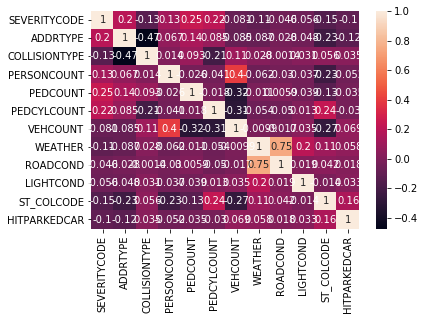

In [16]:
# creating correlation heatmap
corrMatrix = df4.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

#### 3e. Exploratory Data Analysis (EDA)

To get an idea of how the data is distributed some EDA will be conducted. The visualizations show that most accidents happened with parked cars in the daylight with clear weather and dry roads. This goes against initial intuitions of expecting more accidents in bad lighting, weather and road conditions. Furthermore, drugs and alcohol usage are also not a prevalent cause for accidents.

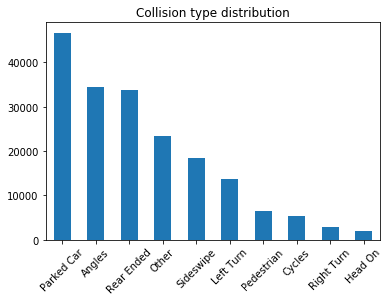

In [17]:
df3['COLLISIONTYPE'].value_counts().plot(kind='bar')
plt.title('Collision type distribution')
plt.xticks(rotation=45)
plt.show()

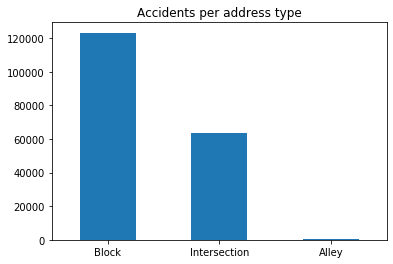

In [18]:
df3['ADDRTYPE'].value_counts().plot(kind='bar')
plt.title('Accidents per address type')
plt.xticks(rotation=360)
plt.show()

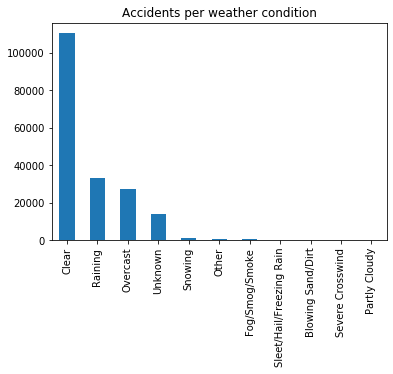

In [19]:
df3['WEATHER'].value_counts().plot(kind='bar')
plt.title('Accidents per weather condition')
plt.show()

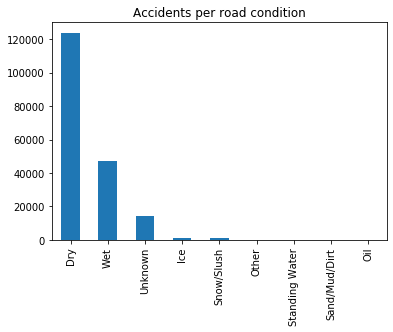

In [20]:
df3['ROADCOND'].value_counts().plot(kind='bar')
plt.title('Accidents per road condition')
plt.show()

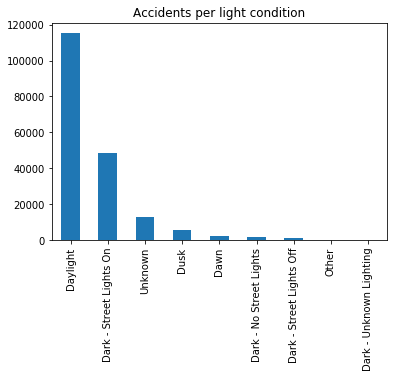

In [21]:
df3['LIGHTCOND'].value_counts().plot(kind='bar')
plt.title('Accidents per light condition')
plt.show()

### 4. Model building

#### 4.1 Feature selection and splitting train/test sets

In [22]:
# Dropping label column and date attributes, date attributes might be revisited
# in a later iteration of this project.
X= df4.drop(['SEVERITYCODE','INCDATE','INCDTTM'], axis=1)
X.head()       


,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,2,0,2,0,0,2,4,8,5,2,0
1,1,9,2,0,0,2,6,8,2,3,0
2,1,5,4,0,0,3,4,0,5,26,0
3,1,4,3,0,0,3,1,0,5,16,0
4,2,0,2,0,0,2,6,8,5,2,0


In [23]:
Y= df4['SEVERITYCODE'].values
Y

array([2, 1, 1, ..., 2, 2, 1], dtype=int64)

In [24]:
# Splitting test set(20%) and train set(80%)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
print('Train set shape:', X_train.shape, y_train.shape)

Train set shape: (150003, 11) (150003,)


#### 4.2 KNN-model

In [25]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model= KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
KNN_model

KNeighborsClassifier()

In [26]:
yhat_knn = KNN_model.predict(X_test)
yhat_knn[:5]

array([2, 1, 1, 1, 1], dtype=int64)

In [27]:
# Optional parameter tuning, took too long to execute on my device
#neighbors = list(range(1,11))
#cv_scores = [ ]
#for K in neighbors:
#    knn = KNeighborsClassifier(n_neighbors = K)
#    scores = cross_val_score(knn,X_train,y_train,cv = 10,scoring =
#    "accuracy")
#    cv_scores.append(scores.mean())
#    
#cv_scores
#plt.plot(neighbors, cv_scores)
#plt.xlabel=('N Neighbors')
#plt.ylabel=('Accuracy')

#### 4.2 Decision tree

In [63]:
from sklearn.tree import DecisionTreeClassifier
Tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
Tree_model.fit(X_train,y_train)
Tree_model

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [29]:
yhat_tree=Tree_model.predict(X_test)
yhat_tree[:5]

array([1, 1, 1, 1, 1], dtype=int64)

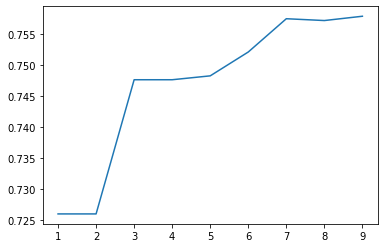

In [30]:
#parameter tuning, picking k=5 to avoid overfitting
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
max_depths = list(range(1,10))
cv_scores_tree = [ ]
for K in max_depths:
    tree = DecisionTreeClassifier(criterion='entropy',max_depth = K)
    scores = cross_val_score(tree,X_train,y_train,cv = 10,scoring =
    "accuracy")
    cv_scores_tree.append(scores.mean())

fig=plt.plot(max_depths, cv_scores_tree)

#### 4.3 Logistic regression

In [35]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01,max_iter=1000).fit(X_train,y_train)
LR_model

LogisticRegression(C=0.01, max_iter=1000)

In [32]:
yhat_lr=LR_model.predict(X_test)
yhat_lr[:5]

array([1, 1, 1, 1, 1], dtype=int64)

<BarContainer object of 5 artists>

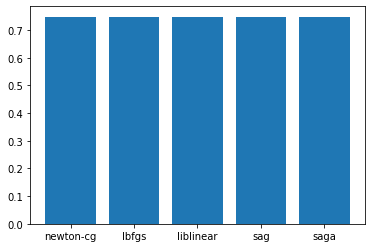

In [44]:
# Parameter tuning, no difference found in solver methods
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
solvers = ['newton-cg','lbfgs','liblinear','sag','saga']
cv_scores_lr = [ ]
for K in solvers:
    lr = LogisticRegression(C=0.01,solver=K,max_iter=1000)
    scores = cross_val_score(lr,X_train,y_train,cv = 10,scoring =
    "accuracy")
    cv_scores_lr.append(scores.mean())
plt.bar(solvers, cv_scores_lr)

In [60]:
knn_predictions= KNN_model.predict(X_test)
print ("KNN model Jaccard index:%.2f" % jaccard_score(y_test,knn_predictions))
print ("KNN model F1-score:%.2f" % f1_score(y_test, knn_predictions, average='weighted'))

KNN model Jaccard index:0.69
KNN model F1-score:0.72


In [64]:
Tree_predictions= Tree_model.predict(X_test)
print ("Decision tree model Jaccard index:%.2f" % jaccard_score(y_test,Tree_predictions))
print ("Decision tree model F1-score:%.2f" % f1_score(y_test, Tree_predictions, average='weighted'))

Decision tree model Jaccard index:0.73
Decision tree model F1-score:0.71


In [65]:
LR_predictions= LR_model.predict(X_test)
LR_prob_predictions=LR_model.predict_proba(X_test)
print ("Logistic regression model Jaccard index:%.2f" % jaccard_score(y_test, LR_predictions))
print ("Logistic regression model F1-score:%.2f" % f1_score(y_test, LR_predictions, average='weighted'))
print('Logistic regression model LogLoss:%.2f'% log_loss(y_test,LR_prob_predictions))

Logistic regression model Jaccard index:0.73
Logistic regression model F1-score:0.70
Logistic regression model LogLoss:0.53


### 5. Results

#### 5.1 Model accuracy results

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.69    | 0.72     | NA      |
| Decision Tree      | 0.73    | 0.71     | NA      |
| LogisticRegression | 0.73    | 0.70     | 0.53    |

The used models show great accuracies ranging from 69% to 73%. They can be further improved upon with several techniques, which will be described in the discussion section.

#### 5.2 Exploratory data analysis results

Alongside the accurate models, this project also provided insightful graphs in the EDA section. With the barplots we can see that most accidents happen in the daylight, with good conditions like clear weather and dry roads. Additionally, the visualizations show that almost all accidents happen in blocks and intersections. The most popular collision types are 'parked cars', 'angles' and 'rear ended'.

### 6. Discussion


#### 6.1 Point of improvements

There are several ways to improve or add to the used machine learning models. Some of these might implemented in a later iteration of this project.

1. Parameter tuning with a wider window (for example, k: 1-50 instead of k: 1-10), parameter tuning on multiple parameters.
2. Using more algorithms to see which perform better.
3. Ensembling the best performing algorithms
4. Imputing some missing values 
5. Picking the right features by comparing models trained on different attributes.
6. Using the datetime attributes to find out when the most (severe) accidents occur.


#### 6.2 Recomendations

The data shows us that most accidents happen in the best, or in the least expected conditions. This information might be useful to spread, such that drivers will also focus when there are no visible threaths like bad lighting and wet roads. Furthermore, most accidents happen in blocks and intersections, so these places deserve to have more attention in terms of road safety when compared to alleys. Aditionally, parked cars are also a prevalent issue that drivers might underestimate due to it being a stationairy object. <br>

Lastly, it seems that machine learning models have a decent amount of accuracy at predicting the severity of accidents. So the government part that is responsible for traffic might take a look at developing such models. This will hopefully contribute to a better understanding of traffic accidents and their severity, which can lead to saver traffic.

### 7. Conclusion

This was an educational and fun project to conduct, where I learned more about data cleaning, exploration and machine learning. There are still some point of improvements that might be added to the project for better results. The dataset and project description has been provided by IBM through the Coursera platform and is part of the [IBM Professional Data science certificate.](https://www.coursera.org/professional-certificates/ibm-data-science)